# N11_beyond_frames

A data frame is a great way to look at data. It appears as a simple spread sheet, and the rows and columns can be easily accessed. There are other models for refering to data frames.  One of these, the time sequence, will be presented, but  used later. 

First, a little help dealing with data frames:

One problem many students have is knowing what they have.  Use the class function to find out what it is.

In [1]:
class(mtcars)
class(UKgas)

[1] "data.frame"

[1] "ts"

The mtcars is a data.frame, and we can use all we have learned on it. The UKgas is a 'ts' (time sequence). It is not the same as a data frame. You cannot use most data frame elements on it.

In [2]:
UKgas

       Qtr1   Qtr2   Qtr3   Qtr4
1960  160.1  129.7   84.8  120.1
1961  160.1  124.9   84.8  116.9
1962  169.7  140.9   89.7  123.3
1963  187.3  144.1   92.9  120.1
1964  176.1  147.3   89.7  123.3
1965  185.7  155.3   99.3  131.3
1966  200.1  161.7  102.5  136.1
1967  204.9  176.1  112.1  140.9
1968  227.3  195.3  115.3  142.5
1969  244.9  214.5  118.5  153.7
1970  244.9  216.1  188.9  142.5
1971  301.0  196.9  136.1  267.3
1972  317.0  230.5  152.1  336.2
1973  371.4  240.1  158.5  355.4
1974  449.9  286.6  179.3  403.4
1975  491.5  321.8  177.7  409.8
1976  593.9  329.8  176.1  483.5
1977  584.3  395.4  187.3  485.1
1978  669.2  421.0  216.1  509.1
1979  827.7  467.5  209.7  542.7
1980  840.5  414.6  217.7  670.8
1981  848.5  437.0  209.7  701.2
1982  925.3  443.4  214.5  683.6
1983  917.3  515.5  224.1  694.8
1984  989.4  477.1  233.7  730.0
1985 1087.0  534.7  281.8  787.6
1986 1163.9  613.1  347.4  782.8

You can see that it has columns representing quarters, and rows representing years. 

In [5]:
UKgas[22]

[1] 155.3

It acts more like a list. There is one value per entry (typically), and they can be accessed in a linear fashion

In [8]:
summary(UKgas)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   84.8   153.3   220.9   337.6   469.9  1163.9 

Many functions treat it like a simple series of data. The summary function understood what to do with the data. If looking for a seasonal trend, then You will find the seasonal nature of the data makes it hard to get reasonable results from combining all the quarters.

In [11]:
UKgas$Qtr1

ERROR: Error in UKgas$Qtr1: $ operator is invalid for atomic vectors


In [19]:
"That didn't work"
UKgas[seq(1,length(UKgas),4)]
window(UKgas,c(1960,1),c(1986,1),1)

[1] "That didn't work"

[1]  160.1  160.1  169.7  187.3  176.1  185.7  200.1  204.9  227.3  244.9
[11]  244.9  301.0  317.0  371.4  449.9  491.5  593.9  584.3  669.2  827.7
[21]  840.5  848.5  925.3  917.3  989.4 1087.0 1163.9

Time Series:
Start = 1960 
End = 1986 
Frequency = 1 
 [1]  160.1  160.1  169.7  187.3  176.1  185.7  200.1  204.9  227.3  244.9
[11]  244.9  301.0  317.0  371.4  449.9  491.5  593.9  584.3  669.2  827.7
[21]  840.5  848.5  925.3  917.3  989.4 1087.0 1163.9

Here, the seq function was used to get items starting at quarter 1, and then each year by skipping ahead 4 quarters. This allows easy access to a column of time sequence data.

The window function does something simular, but returns a time series from the starting and ending dates. The 3rd parameter tells it how many to extract for each year (1= annual, 12=monthly, 4=quarterly, 2=every 6 months.

A summary of this shows how things look in the winter (Quarter 1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  160.1   202.5   371.4   501.4   834.1  1163.9 

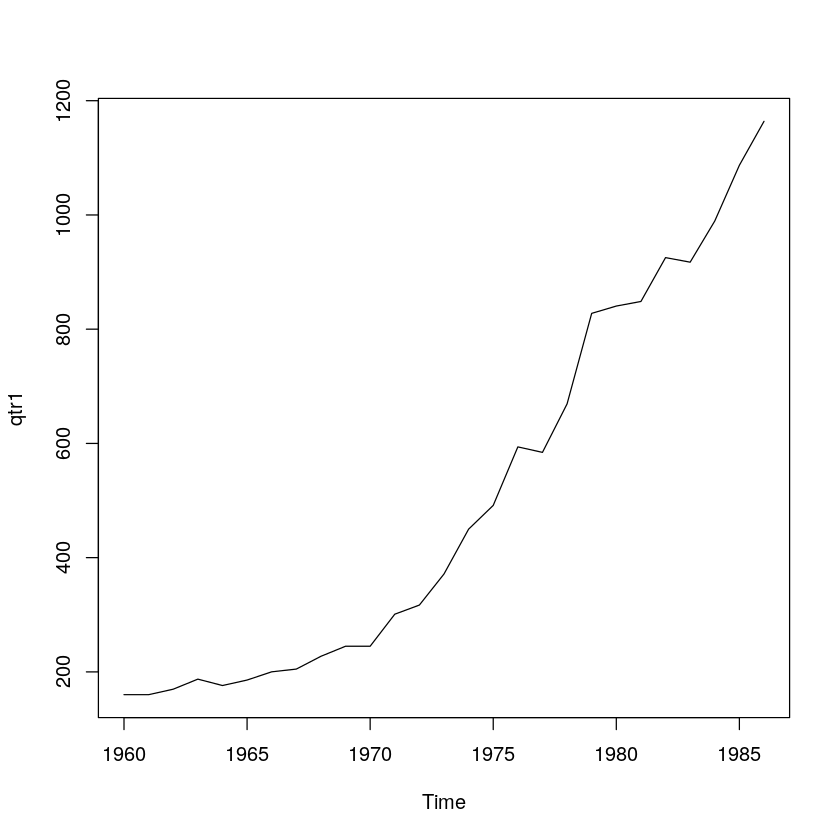

In [20]:
qtr1 <- window(UKgas,c(1960,1),c(1986,1),1)

summary(qtr1)
plot(qtr1)

Note the rapid rise in gas consumption in the winter over the last 10 sample years. Compare this to the consumption in Q3 (assumed to be during the summer) Plot the ratio of winter usage to summer usage to see if general usage has gone up, or just summer usage

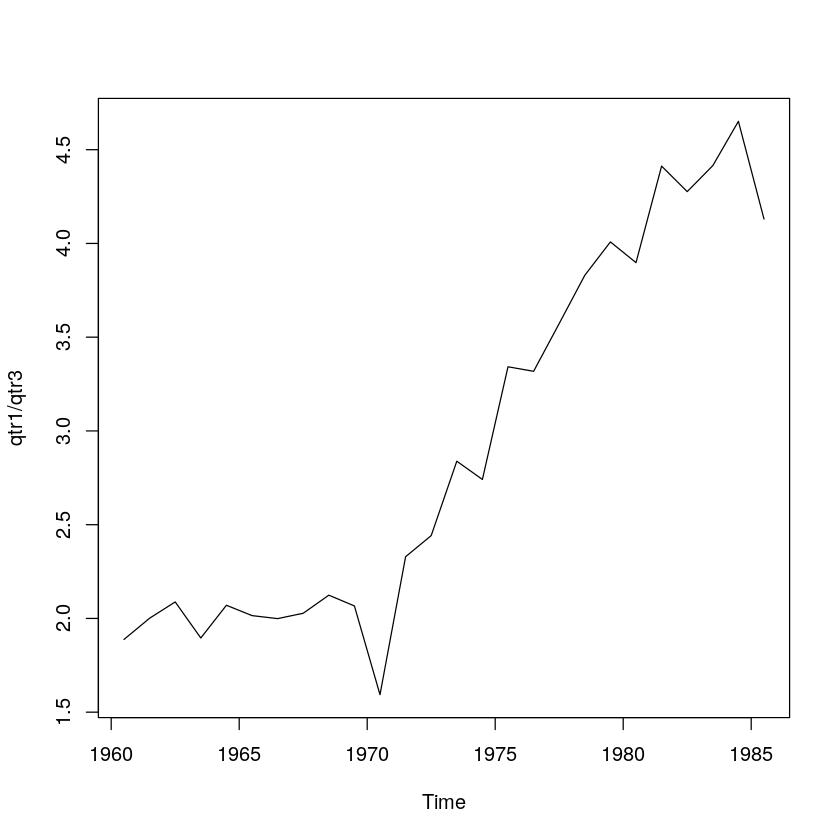

In [33]:
qtr3<- window(UKgas,c(1960,3),c(1986,3),1)
plot(qtr1/qtr3)

Plot just the summer usage

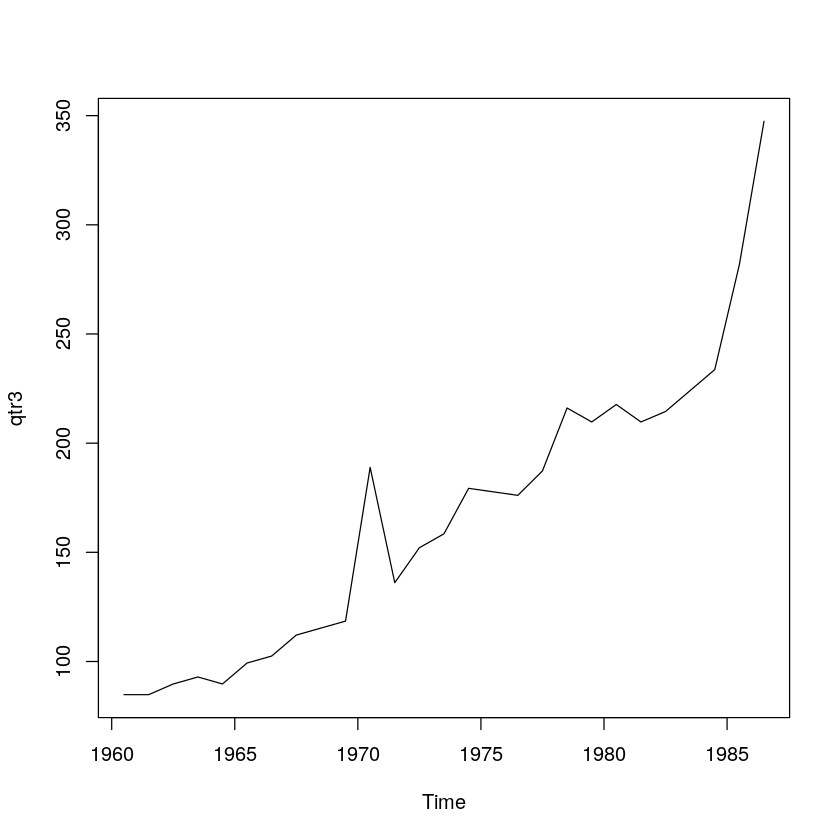

In [34]:
plot(qtr3)

Summer is also going up.

## data.frame hints

Many time, you download a csv, and the data ends up as a factor. To convert it to a number, use as.character to make it a string, and then as.numeric to make the string a number.  This often happens in csv that don't have correct headers, or ones that have some typos in the data.

Assume john is a data fram in factor format and the calorie column is a mess. Try a conversion...

john\$calorie <- as.numeric(as.character(john\$calorie))



In [42]:
john <- data.frame(calorie = c("22","13","19") )
class(john)
john
class(john$calorie)

[1] "data.frame"

calorie
22
13
19


[1] "factor"

In [43]:
john$calorie <- as.numeric(as.character(john$calorie))
class(john$calorie)

[1] "numeric"

It has now been converted to numeric values, and can be used for statistics

## where is bad data ?

Often, you download a piece of data, and it has something bad in it. This prevents converting the data to numeric. The location of the bad data can be found using which.min (Somewhat indirectly)

First an example of which.min (There is also a which.max)


In [46]:
jill <- c(2,4,6,8,3,2,1)
min(jill)
which.min(jill)

[1] 1

[1] 7

In [47]:
jill <- list(2,3,4,"8",3,2,1)
sd(jill)

ERROR: Error: is.atomic(x) is not TRUE


In [56]:
# That didn't work, so where is the problem
is.numeric(jill)
sapply(jill,is.numeric)
which.min(sapply(jill,is.numeric))

[1] FALSE

[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

[1] 4

In the box below, explain how this worked, and how you could use this on a downloaded data set (hint, false is less than true)

Put your comments here

#The function which.min() interprets 1 as TRUE and 0 as FALSE.
So above result will become as:

Interpretated value   1 1 1   0   1 1 1
              index   1 2 3   4   5 6 7

Here 4th index has the 0 value which is less than 1 and thus its the minimum index out of all.

We can clean our data in a following  recursive fashion:
1. Find the minimum/first index of error data.
2. Correct the data.
3. Revisit the loop to geta new minimum index.
4. Correct the data and so on.
.....



Print the screen, download pdf, or what you can do, and submit the results on Canvas.